<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# EPAT Session 1

**Executive Program in Algorithmic Trading**

**_Vectorized Backtesting_**

Prof. Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

<a href="https://home.tpq.io/certificates/pyalgo" target="_blank"><img src="https://hilpisch.com/pyalgo_cover_shadow.png" width="300px" align="left"></a>

## Basic Imports

In [3]:
# import cufflinks
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn-v0_8')
pd.set_option('mode.chained_assignment', None)
np.set_printoptions(suppress=True)
# cufflinks.set_config_file(offline=True)
%config InlineBackend.figure_format = 'svg'

## Reading Financial Data

In [4]:
url = 'https://certificate.tpq.io/findata.csv'

In [5]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)# .dropna()

In [6]:
raw.dropna(inplace=True)

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2518 non-null   float64
 1   MSFT.O  2518 non-null   float64
 2   INTC.O  2518 non-null   float64
 3   AMZN.O  2518 non-null   float64
 4   GS.N    2518 non-null   float64
 5   .SPX    2518 non-null   float64
 6   .VIX    2518 non-null   float64
 7   SPY     2518 non-null   float64
 8   EUR=    2518 non-null   float64
 9   XAU=    2518 non-null   float64
 10  GDX     2518 non-null   float64
 11  GLD     2518 non-null   float64
dtypes: float64(12)
memory usage: 255.7 KB


In [8]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,.SPX,.VIX,SPY,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2013-01-02,19.608195,27.62,21.38,12.86550,131.66,1462.42,14.68,146.0600,1.3184,1686.35,47.1000,163.17
2013-01-03,19.360548,27.25,21.32,12.92400,130.94,1459.37,14.56,145.7341,1.3046,1662.95,45.1403,161.20
2013-01-04,18.821410,26.74,21.16,12.95750,134.51,1466.47,13.83,146.3700,1.3067,1656.24,45.3300,160.44
2013-01-07,18.710696,26.69,21.25,13.42296,134.26,1461.89,13.79,145.9695,1.3115,1646.64,44.4800,159.43
2013-01-08,18.761053,26.55,21.09,13.31900,133.05,1457.15,13.62,145.5496,1.3080,1658.60,44.6500,160.56


In [9]:
rets = np.log(raw / raw.shift(1)).dropna()  # log returns

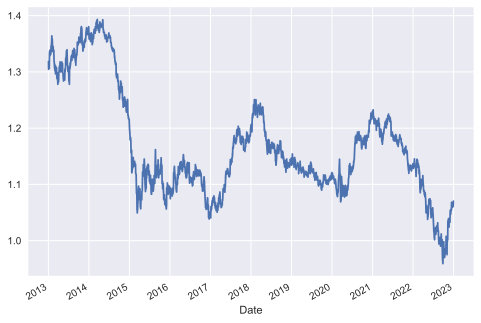

In [10]:
raw['EUR='].plot();

## Efficient Markets

In [9]:
symbol = 'EUR='
symbol = 'RANDOM'

## OLS Regression Based Trading Strategy

We want to use **historical returns** to predict the **direction of next days market movement** (i.e. the sign of next days return, and not the absolute size).

## Vectorized Backtesting

In trading, it is important to get the **large movements** (in absolute terms) correct.

The following backtesting is done under a number of simplifying assumptions, such as zero transaction costs, zero margins for short positions.

In [41]:
symbol = 'EUR='

In [42]:
data = pd.DataFrame(raw[symbol]).dropna()

In [43]:
# log returns
data["r"] = np.log(data[symbol] / data[symbol].shift(1))

In [44]:
# Direction
data["d"] = np.sign(data["r"])

In [45]:
data

,EUR=,r,d
Date,,,
2013-01-02,1.3184,NaN,NaN
2013-01-03,1.3046,-0.010522,-1.0
2013-01-04,1.3067,0.001608,1.0
2013-01-07,1.3115,0.003667,1.0
2013-01-08,1.3080,-0.002672,-1.0
...,...,...,...
2022-12-23,1.0614,0.001980,1.0
2022-12-27,1.0638,0.002259,1.0
2022-12-28,1.0608,-0.002824,-1.0


In [82]:
# Add lag columns, each with lagged or historical data
lags = 7
cols = list()
for lag in range(1, lags +1):
    # print format using f'' command
    col = f'lag_{lag}'
    data[col] = data["r"].shift(lag)
    cols.append(col)

In [48]:
data.head(8)

,EUR=,r,d,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,,,
2013-01-02,1.3184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,1.3046,-0.010522,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,1.3067,0.001608,1.0,-0.010522,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,1.3115,0.003667,1.0,0.001608,-0.010522,NaN,NaN,NaN,NaN,NaN
2013-01-08,1.3080,-0.002672,-1.0,0.003667,0.001608,-0.010522,NaN,NaN,NaN,NaN
2013-01-09,1.3063,-0.001301,-1.0,-0.002672,0.003667,0.001608,-0.010522,NaN,NaN,NaN
2013-01-10,1.3269,0.015647,1.0,-0.001301,-0.002672,0.003667,0.001608,-0.010522,NaN,NaN
2013-01-11,1.3343,0.005561,1.0,0.015647,-0.001301,-0.002672,0.003667,0.001608,-0.010522,NaN


In [49]:
data.dropna(inplace=True)

In [50]:
reg = np.linalg.lstsq(data[cols], data["r"], rcond=None)[0]

In [51]:
reg

array([-0.01533757,  0.00916203, -0.0176203 ,  0.02340831, -0.00158428,
       -0.07001652, -0.00519909])

<BarContainer object of 7 artists>

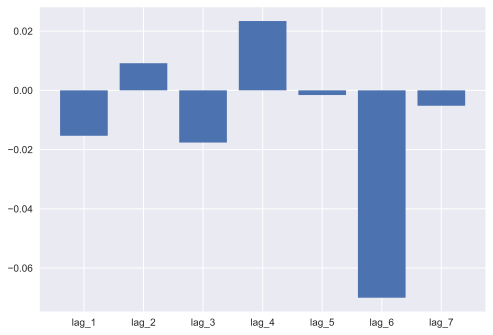

In [52]:
plt.bar(cols, reg)

In [59]:
# multiplies matrix with vector (dot product)
data["e"] = np.dot(data[cols], reg)

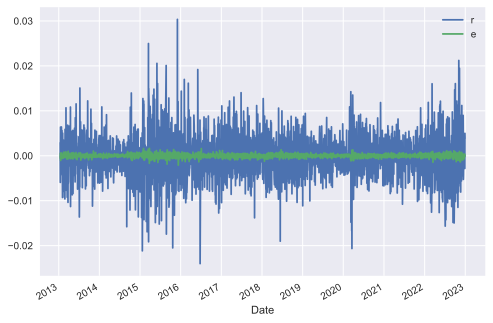

In [65]:
data[["r", "e"]].plot();

In [66]:
# How often does the direction (d) match the estimate (e)
data["d"] == np.sign(data["e"])

Date
2013-01-14    False
2013-01-15     True
2013-01-16    False
2013-01-17     True
2013-01-18     True
              ...  
2022-12-23     True
2022-12-27     True
2022-12-28     True
2022-12-29    False
2022-12-30     True
Length: 2510, dtype: bool

In [68]:
# How accurate is the directional prediction
np.sum(data["d"] == np.sign(data["e"])) / len(data)

0.5239043824701195

In [70]:
# position in the market, p
data["p"] = np.sign(data["e"]) # predicted direction= position in the market

In [71]:
# strategy return = position * market return
data['s'] = data['p'] * data['r'] 

In [73]:
# show data - uncomment below
# data

In [75]:
# sum of log returns - market (r) has negative returns and strategy (s) has positive return
data[["r", "s"]].sum()

r   -0.220561
s    0.744811
dtype: float64

In [81]:
# Compute exponential returns - by applying exponential function
data[["r","s"]].sum().apply(np.exp)

r    0.802069
s    2.106043
dtype: float64

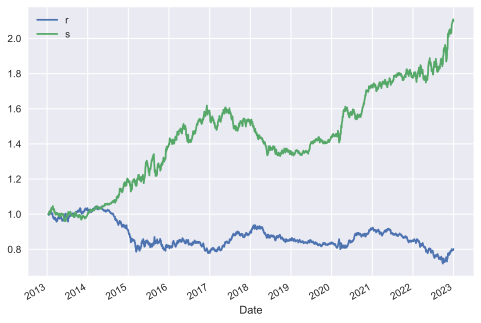

In [80]:
# gross return over time of the market (r) vs the strategy (s)
# Take the cumulative sum of returns and apply exponential function to get exponential returns
data[["r","s"]].cumsum().apply(np.exp).plot();

### Train-Test Split

In [91]:
# how much data do we have?
len(data)

2510

In [92]:
# As a first step, split the data 80:20 for training and then test data
split = int(len(data) * 0.8)
split

2008

In [104]:
# create training data from start to 80% split 
train = data.iloc[:split].copy()
train.head()

,EUR=,r,d,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,e,p,s
Date,,,,,,,,,,,,,
2013-01-14,1.3382,0.002919,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000045,-1.0,-0.002919
2013-01-15,1.3303,-0.005921,-1.0,0.002919,NaN,NaN,NaN,NaN,NaN,NaN,-0.000561,-1.0,0.005921
2013-01-16,1.3289,-0.001053,-1.0,-0.005921,0.002919,NaN,NaN,NaN,NaN,NaN,0.000556,1.0,-0.001053
2013-01-17,1.3374,0.006376,1.0,-0.001053,-0.005921,0.002919,NaN,NaN,NaN,NaN,0.000121,1.0,0.006376
2013-01-18,1.3317,-0.004271,-1.0,0.006376,-0.001053,-0.005921,0.002919,NaN,NaN,NaN,-0.001032,-1.0,0.004271


In [225]:
train.dropna(inplace=True)
reg = np.linalg.lstsq(train[cols], train["r"], rcond=None)[0]
reg

array([-0.02192216,  0.01816129, -0.01391833,  0.01184448,  0.00335256,
       -0.0549646 ,  0.00464301])

,EUR=,r,d,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,e,p,s
Date,,,,,,,,,,,,,
2013-01-24,1.3374,0.004346,1.0,-0.000300,0.000225,-0.004271,0.006376,-0.001053,-0.005921,0.002919,0.000632,1.0,0.004346
2013-01-25,1.3460,0.006410,1.0,0.004346,-0.000300,0.000225,-0.004271,0.006376,-0.001053,-0.005921,-0.000079,-1.0,-0.006410
2013-01-28,1.3455,-0.000372,-1.0,0.006410,0.004346,-0.000300,0.000225,-0.004271,0.006376,-0.001053,-0.000482,-1.0,0.000372
2013-01-29,1.3491,0.002672,1.0,-0.000372,0.006410,0.004346,-0.000300,0.000225,-0.004271,0.006376,0.000246,1.0,0.002672
2013-01-30,1.3567,0.005618,1.0,0.002672,-0.000372,0.006410,0.004346,-0.000300,0.000225,-0.004271,-0.000049,-1.0,-0.005618
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,1.2214,0.002295,1.0,0.000082,0.001972,-0.006639,-0.001061,-0.000897,0.005641,0.003779,-0.000304,-1.0,-0.002295
2020-12-29,1.2247,0.002698,1.0,0.002295,0.000082,0.001972,-0.006639,-0.001061,-0.000897,0.005641,-0.000189,-1.0,-0.002698
2020-12-30,1.2295,0.003912,1.0,0.002698,0.002295,0.000082,0.001972,-0.006639,-0.001061,-0.000897,0.000114,1.0,0.003912


In [10]:
# !pip install quantstats

In [84]:
# install quantstats then uncomment below
import quantstats as qs

In [86]:
# install quantstats then uncomment below
qs.reports.metrics(data['s'], benchmark=data['r'])

                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        2013-01-14   2013-01-14
End Period          2022-12-30   2022-12-30
Risk-Free Rate      0.0%         0.0%
Time in Market      100.0%       100.0%

Cumulative Return   -22.29%      104.06%
CAGR﹪              -1.73%       5.07%

Sharpe              -0.28        0.94
Prob. Sharpe Ratio  19.04%       99.85%
Sortino             -0.39        1.4
Sortino/√2          -0.27        0.99
Omega               1.17         1.17

Max Drawdown        -32.99%      -18.2%
Longest DD Days     3209         1413

Gain/Pain Ratio     -0.05        0.17
Gain/Pain (1M)      -0.2         0.99

Payoff Ratio        1.0          1.0
Profit Factor       0.95         1.17
Common Sense Ratio  0.97         1.28
CPC Index           0.48         0.62
Tail Ratio          1.01         1.09
Outlier Win Ratio   3.7          3.53
Outlier Loss Ratio  3.34         3.5

MTD                 2.83%        2.59%
3M             

## Vectorized Backtesting (OOP Way)

### `FinancialData` Class

In [131]:
class FinancialData:
    url = 'https://certificate.tpq.io/findata.csv'
    
    # initialize
    def __init__(self, symbol):
        self.symbol = symbol
        self.retrieve_data()
        self.prepare_data()
    
    # get data
    def retrieve_data(self):
        self.raw = pd.read_csv(url, index_col=0, parse_dates=True)# .dropna()
    
    # remove na's
    def prepare_data(self):
        self.data = pd.DataFrame(self.raw[self.symbol]).dropna()
        self.data["r"] = np.log(self.data / self.data.shift(1))
    
    # plot data, can specify which columns (optional)
    def plot_data(self, cols=None):
        if cols is None:
            cols = [self.symbol]
        self.data[cols].plot(title=self.symbol)

In [132]:
symbol = "GLD"
fd = FinancialData(symbol)

In [133]:
fd.data.head()

,GLD,r
Date,,
2013-01-02,163.17,NaN
2013-01-03,161.20,-0.012147
2013-01-04,160.44,-0.004726
2013-01-07,159.43,-0.006315
2013-01-08,160.56,0.007063


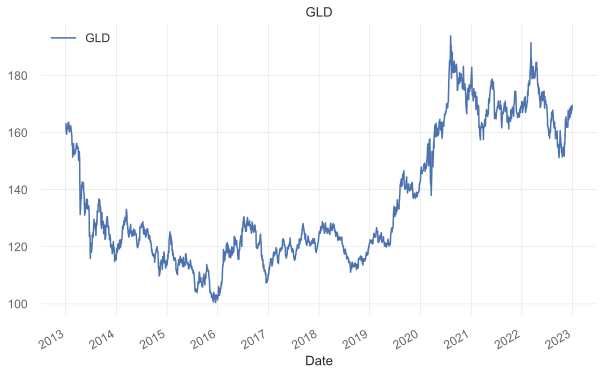

In [134]:
fd.plot_data()

### Vectorized Backtesting Class

The following class implements the backtest based on an "in-sample" approach (no train-test split).

**EXERCISE**: Re-implement the class including train-test split for the backtesting.

In [234]:
class OLSBacktester(FinancialData):
    
    def prepare_lags(self):
        self.cols = list()
        for lag in range(1, self.lags + 1):
            col = f'lag_{lag}'
            self.data[col] = self.data["r"].shift(lag)
            self.cols.append(col)
        self.data.dropna(inplace=True)
            
    def backtest_strategy(self, lags):
        self.prepare_data()
        self.lags = lags
        self.prepare_lags()
        
        # regression step
        reg = np.linalg.lstsq(self.data[self.cols], self.data['r'], rcond=None)[0]
        
        self.data["e"] = np.dot(self.data[self.cols], reg) # prediction/estimation step
        self.data["p"] = np.sign(self.data["e"]) # deriving position values
        self.data["s"] = self.data["p"] * self.data["r"] #strategy returns
        
        perf = self.data[["r","s"]].sum().apply(np.exp) # gross returns
        return perf
        
    def correlation(self):
        print(self.data.corr())
        

In [235]:
ols = OLSBacktester(symbol)

In [236]:
ols.backtest_strategy(lags=2)

r    1.057342
s    0.837135
dtype: float64

In [237]:
ols.data.head(8)

,GLD,r,lag_1,lag_2,e,p,s
Date,,,,,,,
2013-01-07,159.430,-0.006315,-0.004726,-0.012147,0.000237,1.0,-0.006315
2013-01-08,160.560,0.007063,-0.006315,-0.004726,0.000074,1.0,0.007063
2013-01-09,160.490,-0.000436,0.007063,-0.006315,0.000161,1.0,-0.000436
2013-01-10,161.980,0.009241,-0.000436,0.007063,-0.000151,-1.0,-0.009241
2013-01-11,161.060,-0.005696,0.009241,-0.000436,0.000046,1.0,-0.005696
2013-01-14,161.540,0.002976,-0.005696,0.009241,-0.000218,-1.0,-0.002976
2013-01-15,162.558,0.006282,0.002976,-0.005696,0.000132,1.0,0.006282
2013-01-16,162.650,0.000566,0.006282,0.002976,-0.000038,-1.0,-0.000566


In [238]:
# lagged returns are "not" correlatioed with each other i.e. close to zero
ols.correlation()

            GLD         r     lag_1     lag_2         e         p         s
GLD    1.000000  0.031559  0.031647  0.029572 -0.023181 -0.034198  0.019285
r      0.031559  1.000000  0.003904 -0.021067  0.021442 -0.007359 -0.003443
lag_1  0.031647  0.003904  1.000000  0.004043  0.182319  0.179978 -0.033827
lag_2  0.029572 -0.021067  0.004043  1.000000 -0.982494 -0.697940 -0.022186
e     -0.023181  0.021442  0.182319 -0.982494  1.000000  0.719776  0.015512
p     -0.034198 -0.007359  0.179978 -0.697940  0.719776  1.000000  0.002130
s      0.019285 -0.003443 -0.033827 -0.022186  0.015512  0.002130  1.000000


In [239]:
for lags in range (2, 10):
    print(ols.backtest_strategy(lags))

r    1.057342
s    0.837135
dtype: float64
r    1.064041
s    1.670321
dtype: float64
r    1.056552
s    1.221756
dtype: float64
r    1.057013
s    1.206444
dtype: float64
r    1.047290
s    1.197577
dtype: float64
r    1.053272
s    1.431538
dtype: float64
r    1.050142
s    1.254749
dtype: float64
r    1.043566
s    1.901733
dtype: float64


In [240]:
for lags in range (2, 10):
    perf = ols.backtest_strategy(lags)
    print(lags, perf)

2 r    1.057342
s    0.837135
dtype: float64
3 r    1.064041
s    1.670321
dtype: float64
4 r    1.056552
s    1.221756
dtype: float64
5 r    1.057013
s    1.206444
dtype: float64
6 r    1.047290
s    1.197577
dtype: float64
7 r    1.053272
s    1.431538
dtype: float64
8 r    1.050142
s    1.254749
dtype: float64
9 r    1.043566
s    1.901733
dtype: float64


In [245]:
res = pd.DataFrame()
for lags in range (2, 10):
    perf = ols.backtest_strategy(lags)
    df = pd.DataFrame({"SYM": ols.symbol, "LAGS": lags, "BENCH": perf["r"], "STRAT": perf["s"]}, index=[0])
    res = pd.concat((res,df), ignore_index=True)

In [246]:
# display results
res

,SYM,LAGS,BENCH,STRAT
0,GLD,2,1.057342,0.837135
1,GLD,3,1.064041,1.670321
2,GLD,4,1.056552,1.221756
3,GLD,5,1.057013,1.206444
4,GLD,6,1.047290,1.197577
5,GLD,7,1.053272,1.431538
6,GLD,8,1.050142,1.254749
7,GLD,9,1.043566,1.901733


In [247]:
# sort results
res.sort_values("STRAT", ascending=False)

,SYM,LAGS,BENCH,STRAT
7,GLD,9,1.043566,1.901733
1,GLD,3,1.064041,1.670321
5,GLD,7,1.053272,1.431538
6,GLD,8,1.050142,1.254749
2,GLD,4,1.056552,1.221756
3,GLD,5,1.057013,1.206444
4,GLD,6,1.047290,1.197577
0,GLD,2,1.057342,0.837135


<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>